# How to Use PubPlotLib (`pplt`)

Welcome to PubPlotLib! This notebook demonstrates how to create publication-quality figures with minimal effort, using journal-specific sizing and styles.

**Key features:**
- Use `pplt.figure` and `pplt.subplots` as drop-in replacements for matplotlib's, with automatic sizing and style.
- Pass any matplotlib keyword arguments you like.
- Choose your journal once with `set_journal`, or per-figure.
- Access the `Journal` object for custom sizing.
- Control the height with `height_ratio` for flexible layouts.


### Quick Start: Import and Set a Journal

Import the package and set your target journal. This will automatically apply the correct style and sizing for all your figures.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pubplotlib as pplt

# Set the journal globally (e.g., 'aanda')
pplt.set_journal('apj')

### Recommended: Use `pplt.figure` and `pplt.subplots`

These functions wrap the standard matplotlib ones, but automatically set the correct `figsize` for your journal. You can pass any matplotlib keyword arguments you like!

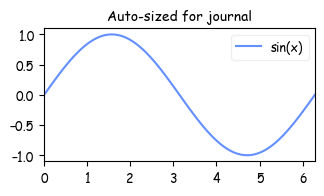

In [2]:
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

fig, ax = pplt.subplots(journal='apj')
ax.plot(x, y, label='sin(x)')
ax.set_title('Auto-sized for journal')
ax.legend()
plt.show()

Use the `twocols=True` argument to get a two-column width figure, perfect for journal double-column layouts.

Control the vertical size of your figure without affecting the width or text scaling using `height_ratio`

You can pass the journal name directly to `figure` or `subplots`. Alternatively `pubplotlib` will use the last journal set with `pplt.set_journal()`.

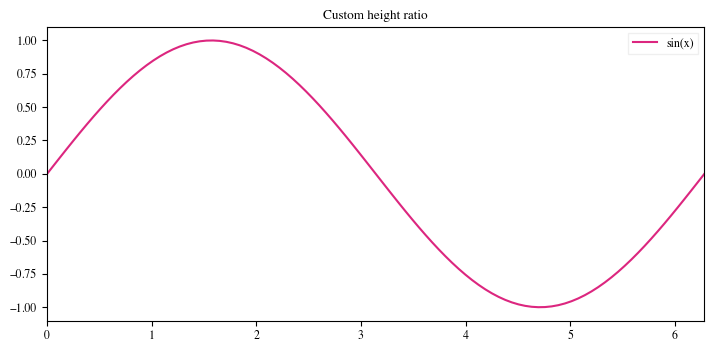

In [3]:
fig, ax = pplt.subplots(journal='aanda', twocols=True, height_ratio=0.5)
ax.plot(x, y, color='C2', label='sin(x)')
ax.set_title('Custom height ratio')
ax.legend()
plt.show()

You can access the current `Journal` object to get the exact one-column and two-column widths and set the `figsize` as desired in the default `matplotlib.pyplot.figure` or `matplotlib.pyplot.subplots`.

One column width: 3.5422720354227204
Two column width: 7.243669572436696


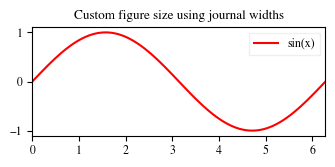

In [4]:
journal = pplt.get_style()
print("One column width:", journal.onecol)
print("Two column width:", journal.twocol)

# Use them for custom figure sizes
fig, ax = plt.subplots(figsize=(journal.onecol, journal.onecol * 0.5))
ax.plot(x, y, color='red', label='sin(x)')
ax.set_title('Custom figure size using journal widths')
ax.legend()
plt.show()

You can also create your custom `Journal` object with the style you prefer!

In [5]:
pplt.restore()

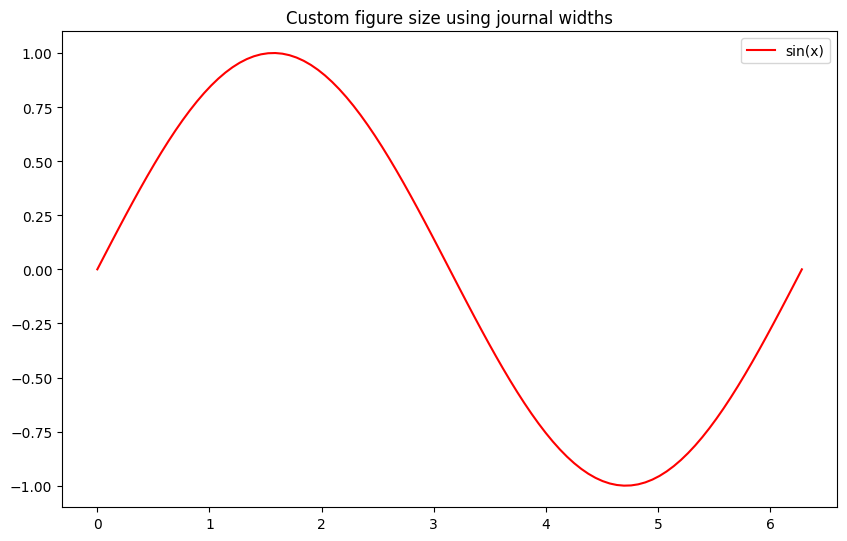

In [6]:
myJour = pplt.Journal(
    name="myJournal",
    onecol=10.,
    twocol=20.,
    mplstyle=None # This assumes not to use any specific custom style. path/to/mplstyle can be provided here to define a custom style.
)

# Use them for custom figure sizes
fig, ax = pplt.subplots(journal=myJour)
ax.plot(x, y, color='red', label='sin(x)')
ax.set_title('Custom figure size using journal widths')
ax.legend()
plt.show()

If you want to add it permanently to the list of journals you can simply register your new journal!

In [7]:
myJour.register(overwrite=True)

In [8]:
pplt.stylebuilder.remove_style('myJournal')

Last but not least, you can easily set the direction and lenght of the ticks in the whole figure with the `pplt.set_ticks()` function!
In the same way you can make logarithmic axes use cool formatters that do not format 1 as $10^{0}$ (🤮)...

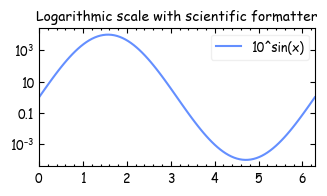

In [9]:
# Make a logarithmic plot to the the formatter in action
fig, ax = pplt.subplots(journal='apj')
ax.plot(x, 10**(y*4), label='10^sin(x)')
ax.set_yscale('log')
ax.set_title('Logarithmic scale with scientific formatter')
ax.legend()
pplt.set_ticks()
pplt.set_formatter()
plt.show()